In [7]:
%matplotlib inline

import matplotlib.pyplot as pl
import numpy as np
import FP_Response

In [3]:
start = 0
stop = 8
x = np.logspace(start, stop, num=1000)

In [4]:
r_a = 0.985
r_b = 1.0 
L = 4000

resp_L = FP_Response.Delta_L(x,r_a,r_b,L)
resp_F = FP_Response.Delta_F(x,r_a,r_b,L)

In [5]:
mag_L = np.absolute(resp_L) 
phs_L = np.angle(resp_L)

mag_F = np.absolute(resp_F) 
phs_F = np.angle(resp_F)

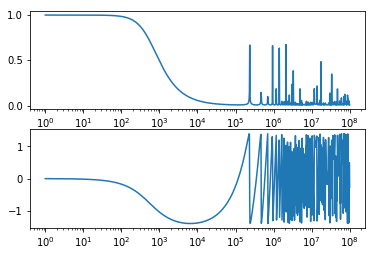

In [6]:
pl.subplot(2,1,1)
pl.semilogx(x,mag_L)

pl.subplot(2,1,2)
pl.semilogx(x,phs_L)

pl.show()

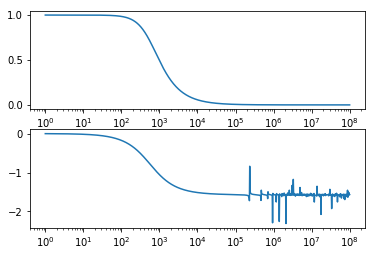

In [7]:
pl.subplot(2,1,1)
pl.semilogx(x,mag_F)

pl.subplot(2,1,2)
pl.semilogx(x,phs_F)

pl.show()

In [8]:
### Finesse Simulation portion
import pykat
import pylab as pl
import numpy as np

kat_code = '''
l laser 1 0 nin                          % Laser P=1W f_offset=0Hz
mod EOM 15M 0.001 1 pm nin n0            % Phase modulator f_mod=15MHz, modulation index=0.001

s s0 0 n0 n1
bs pickoff 0 1 0 45 n1 dump n2 n3    % Beam splitter with R=0.1, T=0.9 at zero tuning
s s1 0.1 n2 n4                           % Space 10cm length

m ITM 0.8819765 0.118 0 n4 n5                  % Cavity input mirror with R=0.99, T=0.01, at zero tuning
s scavity 2999.5 n5 n6                        % Space 1m length
m ETM 0.99995 50u 0 n6 n7                  % Cavity end mirror with R=0.99, T=0.01, at zero tuning

pd1 PDH 15M 0 n4                        % Photodetector with demodulation at 15MHz, demodulation phase 0
pd1 PDHtran 15M 0 n7
pd PDrefl n4
pd PDtran n7                      
pd PDcirc n6

xaxis ETM phi lin -20 20 1001
'''
### Find the gaussian beam parameter at the first optic
basekat = pykat.finesse.kat() 
basekat.parseCommands(kat_code)
basekat.undumpNodes() #undump thevacuum nodes to get the right quantum noise
kat=basekat.deepcopy() #copy kat code
kat.verbose = False

out = kat.run()

freq = (3e8/(4*np.pi*kat.scavity.L) * out.x)/1e6

C:\Users\tvo88\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


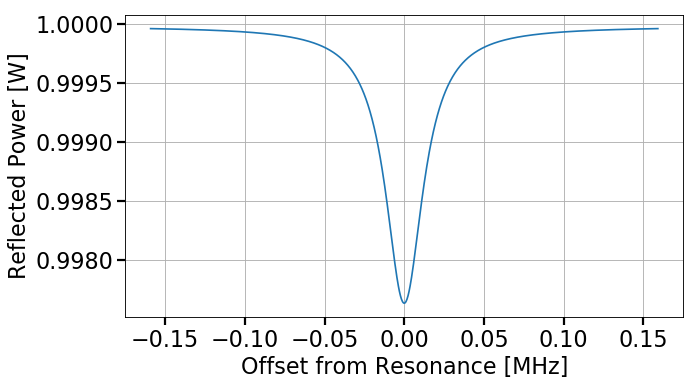

In [9]:
pl.figure(figsize=(9, 5), dpi=80)

pl.subplot(111)
pl.plot(freq, out['PDrefl'])
pl.legend(fontsize=15)

pl.xlabel("Offset from Resonance [MHz]",fontsize=20)
pl.ylabel("Reflected Power [W]",fontsize=20)

###Main plot formatting
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)

C:\Users\tvo88\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


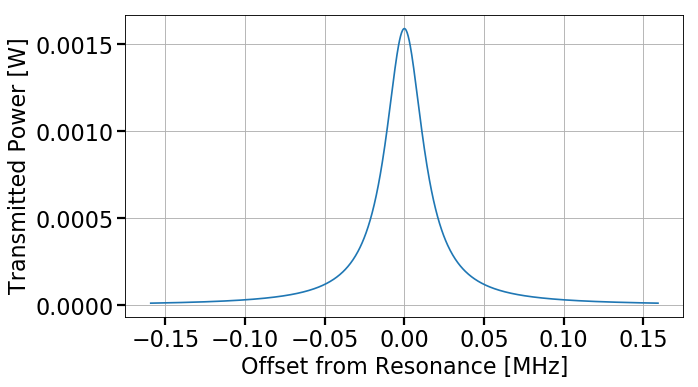

In [10]:
pl.figure(figsize=(9, 5), dpi=80)

pl.subplot(111)
pl.plot(freq, out['PDtran'])
pl.legend(fontsize=15)

pl.xlabel("Offset from Resonance [MHz]",fontsize=20)
pl.ylabel("Transmitted Power [W]",fontsize=20)

###Main plot formatting
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)

C:\Users\tvo88\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


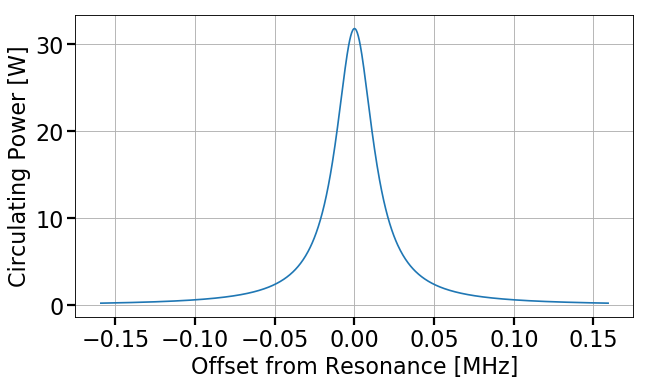

In [11]:
pl.figure(figsize=(9, 5), dpi=80)

pl.subplot(111)
pl.plot(freq, out['PDcirc'])
pl.legend(fontsize=15)

pl.xlabel("Offset from Resonance [MHz]",fontsize=20)
pl.ylabel("Circulating Power [W]",fontsize=20)

###Main plot formatting
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)

C:\Users\tvo88\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


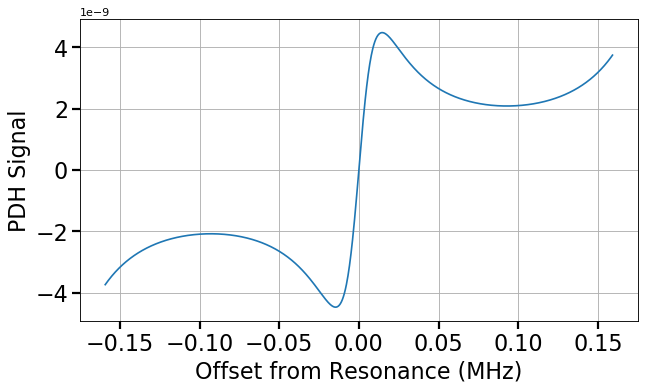

In [14]:
pl.figure(figsize=(9, 5), dpi=80)

pl.subplot(111)
#pl.plot(freq, out['PDH'])
pl.plot(freq, out['PDHtran'])
pl.legend(fontsize=15)

pl.xlabel("Offset from Resonance (MHz)",fontsize=20)
pl.ylabel("PDH Signal",fontsize=20)

###Main plot formatting
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)